## Predicción del rendimiento de jugadores NBA

-Autor: Juan Pedro Zorrilla, D.A.-D.S.

-Fecha: 13/01/2026

In [ ]:
## 1. Configuración Inicial y Carga De librerías

# Utilizaremos pandas y numpy, muy útiles para procesar matrices y vectores

import pandas as pd
!pip install pandas numpy nba_api

import numpy as np

#Librería específica para datos de la NBA
# Nos comunicamos con los servidores de la liga sin escribir código HTTP
from nba_api.stats.static import players
from nba_api.stats.endpoints import LeagueDashPlayerStats

# --- Definición de Parámetros de Extracción ---
# Selección las temporadas a analizar
START_YEAR = 2010
END_YEAR = 2024

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 15.3 MB/s eta 0:00:00


In [ ]:
## 2. Definición de la Función para la Extracción de Datos de la NBA

def obtener_stats_temporadas (start_year, end_year):
  """
  Descarga estadísticas de jugadores NBA para un rango de temporadas
  """
  all_stats = []

  # La API requiere el formato 'YYYY-YY', por ejemplo '2023-24'
  for year in range(start_year, end_year + 1):
    season = f"{year}-{str(year + 1)[2:]}"
    print(f"Descargando estadísticas para la temporada: {season}...")

    try:
      #End point para obtener las estadísticas de la liga por jugador
      data = LeagueDashPlayerStats(season=season,
                                                       #ajustamos a 'Regular Season' para análisis estándar
                                                       season_type_all_star='Regular Season'
                                                      )

      # Convertimos el resultado en un DataFrame de pandas
      df = data.get_data_frames()[0]
      # Añadimos una columna para la temporada que acabamos de descargar
      df['SEASON'] = season
      all_stats.append(df)

    except Exception as e:
      print(f"Error al descargar {season}: {e}")
      continue

  # Concatenamos todos los DataFrames de las diferentes temporadas
  final_df = pd.concat(all_stats, ignore_index=True)
  return final_df

# Rango de temporadas para el análisis (2010-11 hasta 2023-24)
# Empezamos desde 2010 para asegurar un volumen de datos relevante
start_year = 2010
end_year = 2024

df_raw = obtener_stats_temporadas(start_year, end_year)

# Vemos las primeras filas y la forma del DataFrame
print("\nDataFrame Obtenido:")
print(f"forma (filas, columnas): {df_raw.shape}")
print(df_raw.head())

Descargando estadísticas para la temporada: 2010-11...
Descargando estadísticas para la temporada: 2011-12...
Descargando estadísticas para la temporada: 2012-13...
Descargando estadísticas para la temporada: 2013-14...
Descargando estadísticas para la temporada: 2014-15...
Descargando estadísticas para la temporada: 2015-16...
Descargando estadísticas para la temporada: 2016-17...
Descargando estadísticas para la temporada: 2017-18...
Descargando estadísticas para la temporada: 2018-19...
Descargando estadísticas para la temporada: 2019-20...
Descargando estadísticas para la temporada: 2020-21...
Descargando estadísticas para la temporada: 2021-22...
Descargando estadísticas para la temporada: 2022-23...
Descargando estadísticas para la temporada: 2023-24...
Descargando estadísticas para la temporada: 2024-25...

DataFrame Obtenido:
forma (filas, columnas): (7759, 68)
   PLAYER_ID    PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP  \
0     201985       AJ Price       AJ  

In [ ]:
## 3. Ejecución de la Extracción y Exploración Inicial

# 3.1. Extracción de Datos
df_raw = obtener_stats_temporadas(START_YEAR, END_YEAR)

# 3.2. Verificación de la Estructura
print(f"Total de registros descargados: {df_raw.shape[0]} temporadas/jugador")
print (f"Total de columnas: {df_raw.shape[0]}")

# Inspección de las primeras filas y tipos de datos (dtype)
print("\n--- Vista preliminar del DataFrame ---")
display(df_raw.head())
print("\n--- Información de Tipos de Datos (d-types) ---")
df_raw.info(verbose=False)

Descargando estadísticas para la temporada: 2010-11...
Descargando estadísticas para la temporada: 2011-12...
Descargando estadísticas para la temporada: 2012-13...
Descargando estadísticas para la temporada: 2013-14...
Descargando estadísticas para la temporada: 2014-15...
Descargando estadísticas para la temporada: 2015-16...
Descargando estadísticas para la temporada: 2016-17...
Descargando estadísticas para la temporada: 2017-18...
Descargando estadísticas para la temporada: 2018-19...
Descargando estadísticas para la temporada: 2019-20...
Descargando estadísticas para la temporada: 2020-21...
Descargando estadísticas para la temporada: 2021-22...
Descargando estadísticas para la temporada: 2022-23...
Descargando estadísticas para la temporada: 2023-24...
Error al descargar 2023-24: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
Descargando estadísticas para la temporada: 2024-25...
Total de registros descargados: 7187 temporadas/jugador
Tota

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT,SEASON
0,201985,AJ Price,AJ,1610612754,IND,24.0,50,22,28,0.440,...,119,232,261,150,287,224,27,282,1,2010-11
1,201166,Aaron Brooks,Aaron,1610612756,PHX,26.0,59,26,33,0.441,...,232,153,166,386,204,154,27,196,2,2010-11
2,201189,Aaron Gray,Aaron,1610612740,NOH,26.0,41,21,20,0.512,...,194,348,350,148,329,154,27,332,1,2010-11
3,201151,Acie Law,Acie,1610612744,GSW,26.0,51,20,31,0.392,...,119,271,305,362,309,224,27,312,2,2010-11
4,1733,Al Harrington,Al,1610612743,DEN,31.0,73,45,28,0.616,...,402,176,127,85,160,181,27,141,1,2010-11



--- Información de Tipos de Datos (d-types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7187 entries, 0 to 7186
Columns: 68 entries, PLAYER_ID to SEASON
dtypes: float64(8), int64(56), object(4)
memory usage: 3.7+ MB


El resultado (7190, 68) es nuestra primera prueba de éxito. Nos dice que tenemos 7,190 observaciones (filas: combinaciones de jugador-temporada) y 68 variables (columnas: métricas estadísticas). Por otro lado, con (.dtypes) verificamos que los números sean reconocidos como números (float64, int64) y los textos como objetos (object). Esto es crucial porque no podemos realizar operaciones matemáticas, como las que haremos más adelante, sobre texto.

In [ ]:
## 4. Ingeniería de Características y Creación del Target (Y)

# 4.1. Deduplicación Robusta (eliminación de datos redundantes)
def get_total_row(group):
    # Si existe el registro 'TOT' (Total de la liga), lo usamos
    if 'TOT' in group['TEAM_ABBREVIATION'].values:
        return group[group['TEAM_ABBREVIATION'] == 'TOT']
    else:
        # Si no, usamos el único registro disponible
        return group.iloc[[0]]

# Aplicamos la deduplicación
df_processed = df_raw.groupby(['PLAYER_ID', 'SEASON']).apply(get_total_row).reset_index(drop=True).copy()

## 4.2. Cálculo de Estadísticas 'Per Game' (Promedios) - VERSIÓN CORREGIDA
# Añadimos 'MIN' a la lista y mejoramos el nombramiento
cols_to_per_game = ['MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA']

for col in cols_to_per_game:
    # Creamos el nombre de forma más segura: Ejemplo 'MIN_PG', 'FG3M_PG'
    df_processed[f"{col}_PG"] = df_processed[col] / df_processed['GP']

df_processed = df_processed.fillna(0)

## 4.3. Creación de la Variable Objetivo (Y)
df_processed = df_processed.sort_values(by=['PLAYER_ID', 'SEASON'])
df_processed['PPG_T+1'] = df_processed.groupby('PLAYER_ID')['PTS_PG'].shift(-1)
df_final = df_processed.dropna(subset=['PPG_T+1']).copy()

print("✅ Columnas creadas correctamente: ", [c for c in df_final.columns if '_PG' in c])

✅ Columnas creadas correctamente:  ['MIN_PG', 'PTS_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TOV_PG', 'FGM_PG', 'FGA_PG', 'FG3M_PG', 'FG3A_PG', 'FTM_PG', 'FTA_PG']


/tmp/ipython-input-2420648921.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_processed = df_raw.groupby(['PLAYER_ID', 'SEASON']).apply(get_total_row).reset_index(drop=True).copy()


Mediante la consolidación de registros (TOT), la normalización de estadísticas por partido y la alineación temporal de la variable objetivo ($PPG_{T+1}$), hemos construido una base de datos coherente donde cada fila representa una oportunidad de aprendizaje real sobre la evolución de un jugador.Este proceso garantiza que el modelo no solo aprenda "cuántos puntos anota un jugador", sino cómo su carga de trabajo (minutos), volumen de tiro y eficiencia actual son indicadores de su rendimiento futuro, eliminando el ruido estadístico que suelen introducir los traspasos y las muestras de partidos pequeñas.

In [ ]:
## 5. Limpieza de Ruido y Selección de Características

# Filtro de representatividad
df_final = df_final[df_final['GP'] >= 10].copy()

# Análisis de Correlación
numeric_cols = df_final.select_dtypes(include=[np.number])
correlations = numeric_cols.corr()['PPG_T+1'].sort_values(ascending=False)

print("\n--- Variables más influyentes para predecir PPG_T+1 ---")
print(correlations.head(10))


--- Variables más influyentes para predecir PPG_T+1 ---
PPG_T+1             1.000000
PTS_PG              0.856058
FGM_PG              0.842729
FGA_PG              0.833533
PTS                 0.806623
FGM                 0.791931
FGA                 0.784568
FTM_PG              0.779953
WNBA_FANTASY_PTS    0.764331
FTA_PG              0.761876
Name: PPG_T+1, dtype: float64


Aquí eliminamos las "anomalías" estadísticas:

Filtros de Significancia: Se excluyen jugadores con menos de 20 partidos jugados o menos de 5 minutos por partido. Esto elimina a jugadores con roles muy limitados que podrían sesgar el modelo con promedios poco representativos.

Manejo de Nulos: Se eliminan los registros incompletos para asegurar que todas las entradas tengan el set completo de variables necesarias para el entrenamiento.

Curación de Datos: Definimos el set final de columnas que pasarán a la fase de entrenamiento, descartando identificadores innecesarios.

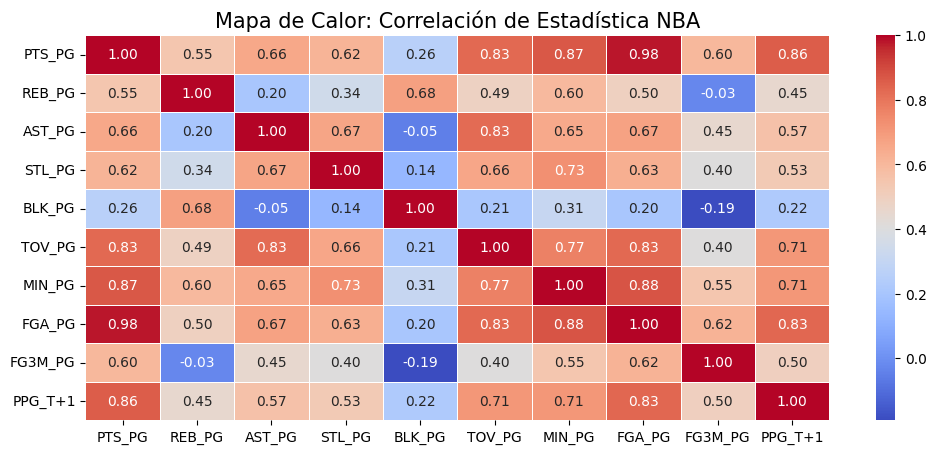

In [ ]:
## 5.1. Visualización de Correlación con Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionamos las variables más interesantes para el gráfico
# como 'Per Game' y el Target

cols_interes= [
    'PTS_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TOV_PG', 'MIN_PG', 'FGA_PG', 'FG3M_PG', 'PPG_T+1'
]

# 2. Calculamos la maytriz de correlación solo de esas columnas
corr_matrix = df_final[cols_interes].corr()

# 3. Configuramos el linezo del gráfico
plt.figure(figsize=(12,5))

# 4. Creamos el Hetmap
# 'annot=True' escribe los números dentro de los cuadrados
# 'cmap' define los colores (coolwarm va de azul a rojo)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor: Correlación de Estadística NBA", fontsize=15)
plt.show()

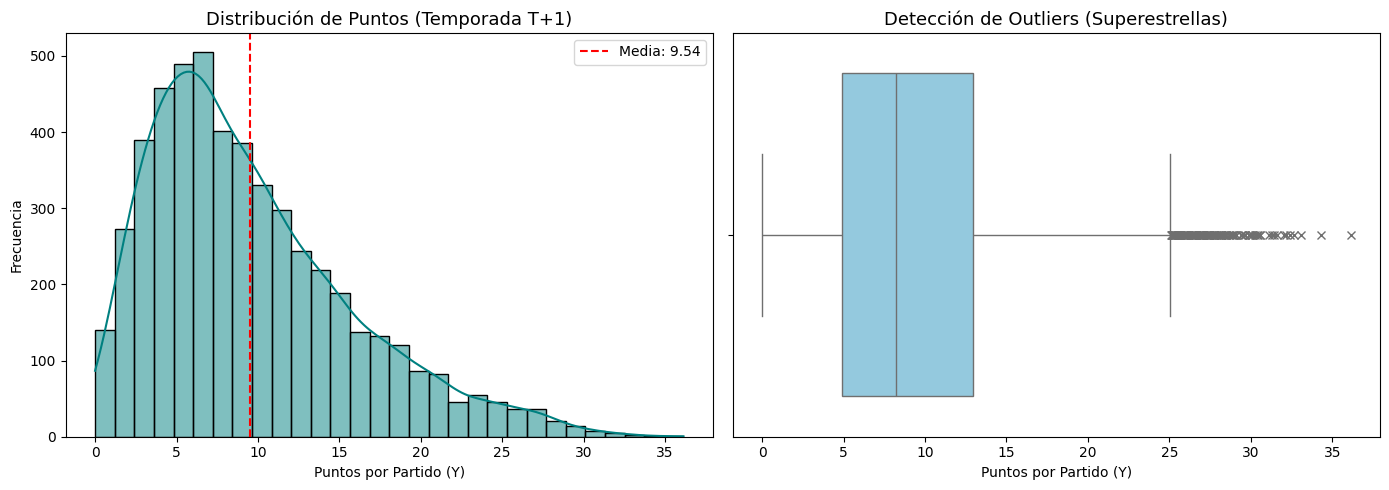

In [ ]:
## 5.2. Análisis de Distribución de la Variable Objetivo

plt.figure(figsize=(14, 5))

# 1. Histograma con Curva de Densidad (KDE)
# Corregido: sns.histplot (sin la 'o' sobrante)
plt.subplot(1, 2, 1)
sns.histplot(df_final['PPG_T+1'], kde=True, color='teal', bins=30)
plt.axvline(df_final['PPG_T+1'].mean(), color='red', linestyle='--', label=f"Media: {df_final['PPG_T+1'].mean():.2f}")
plt.title('Distribución de Puntos (Temporada T+1)', fontsize=13)
plt.xlabel('Puntos por Partido (Y)')
plt.ylabel('Frecuencia')
plt.legend()

# 2. Boxplot para detección de Outliers (Casos Atípicos)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['PPG_T+1'], color='skyblue', flierprops={"marker": "x"})
plt.title('Detección de Outliers (Superestrellas)', fontsize=13)
plt.xlabel('Puntos por Partido (Y)')

plt.tight_layout()
plt.show()

Con las imagenes confirmamos visualmente que hay una correlación entre puntos, minutos, lanzamientos por juego y que, como suele ocurrir, pocos jugadores anotando más de 20 puntos y muchos jugadores anotando menos.

In [ ]:
## 6. Construcción  y Evaluación del Modelo de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 1. Selección de Variables (Features)
# Elegimos un set equilibrado de volumen, eficiencia y presencia en cancha
features =['PTS_PG', 'MIN_PG', 'FGA_PG', 'REB_PG', 'AST_PG', 'TOV_PG', 'GP']

X = df_final[features]
y = df_final['PPG_T+1']

# 2. División  en Entrenamiento (80%) y Prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# 3. Entrenamiento del Modelo
model = LinearRegression()
model.fit (X_train, y_train)

# 4. Generación de Predicciones
predictions = model.predict(X_test)

# 5. Cálculo de Métricas Profesionales
mae= mean_absolute_error(y_test, predictions)
rmse= np.sqrt(mean_squared_error(y_test, predictions))
r2= r2_score(y_test, predictions)

print("---📊 RESULTADOS DEL MODELO DE REGRESIÓN ---")
print(f"R-Cuadrado (R²): {r2:.4f}")
print(f"Erorr Absoluto Medio (MAE):{mae:.4f} puntos")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f} puntos")


---📊 RESULTADOS DEL MODELO DE REGRESIÓN ---
R-Cuadrado (R²): 0.7519
Erorr Absoluto Medio (MAE):2.4794 puntos
Raíz del Error Cuadrático Medio (RMSE): 3.1266 puntos


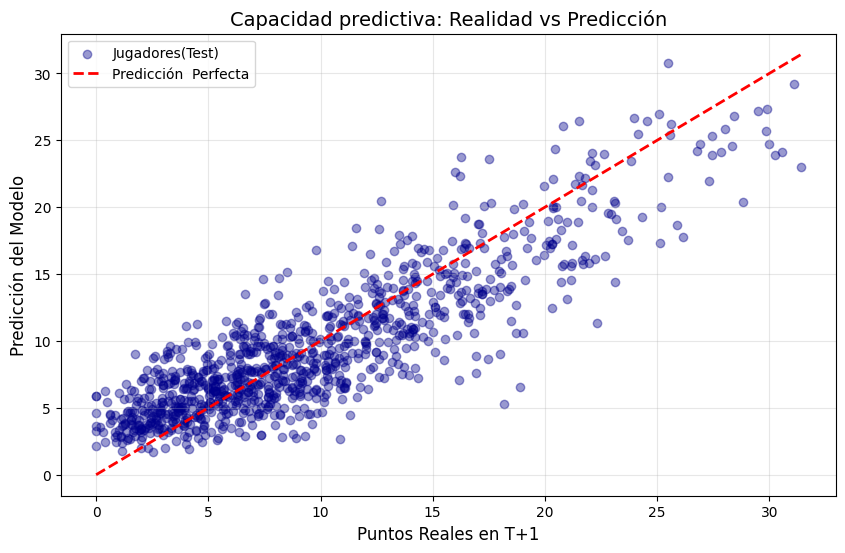

In [ ]:
## 6.1. Visualización: Realidad vs Predicción
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.4, color= 'darkblue', label='Jugadores(Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
          color='red', linestyle='--', lw=2, label= 'Predicción  Perfecta')

plt.title('Capacidad predictiva: Realidad vs Predicción', fontsize=14)
plt.xlabel('Puntos Reales en T+1', fontsize=12)
plt.ylabel('Predicción del Modelo', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


El modelo arrojó estos resultado:
* R-Cuadrado (R²): 0.7519
* Erorr Absoluto Medio (MAE):2.4794 puntos
* Raíz del Error Cuadrático Medio (RMSE): 3.1266 puntos

Los valores son buenos y si analizamos la gráfica, vemos que: la nube de puntos sigue la diagonal roja trazada, la mayoría de los puntos se concentra entre los 5 y 15 puntos (la mayoría de los jugadores), mientras que más de los 15 puntos tenemos a otros jugadores (figuras, all starts), donde el modelo tiende a fallar.

---📊 RESULTADOS DEL MODELO RANDOM FOREST ---
R-Cuadrado (R²): 0.7388(Anterior:0.7519)
Erorr Absoluto Medio (MAE):2.5660 puntos (Anterior: 2.4794)


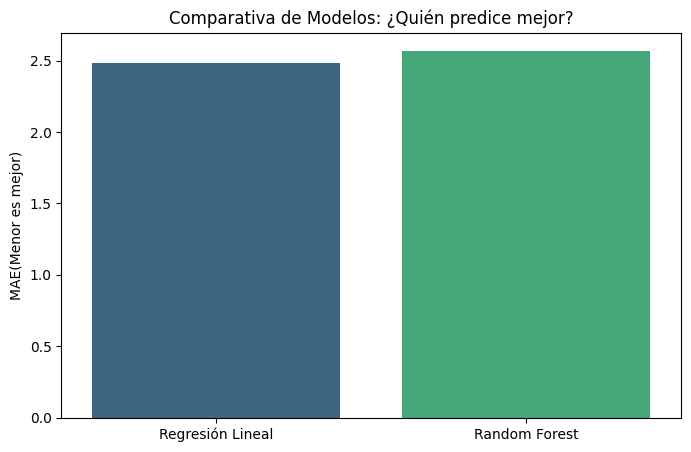

In [ ]:
## 7. Desarrollo del Modelo: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# 1. Instanciar el modelo
# 'n_estimators= 100' significa que crearemos 100 árboles de desición
rf_model= RandomForestRegressor(n_estimators= 100, random_state=42)

# 2. Entrenar el modelo
rf_model.fit(X_train, y_train)

# 3. Prediccciones
rf_preds = rf_model.predict(X_test)

# 4. Métricas
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("---📊 RESULTADOS DEL MODELO RANDOM FOREST ---")
print(f"R-Cuadrado (R²): {rf_r2:.4f}(Anterior:0.7519)")
print(f"Erorr Absoluto Medio (MAE):{rf_mae:.4f} puntos (Anterior: 2.4794)")

# 5. Comparativa Visual de Errores
modelos =['Regresión Lineal', 'Random Forest']
maes = [mae, rf_mae]

plt.figure(figsize=(8, 5))
sns.barplot(x=modelos, y=maes, hue=modelos, palette='viridis', legend=False)
plt.ylabel('MAE(Menor es mejor)')
plt.title('Comparativa de Modelos: ¿Quién predice mejor?')
plt.show()

Como vemos, el Random Forest nos introduce un ruido innecesario (overfitting), por lo que trataremos de mejorar nuestro modelo de Regresión Lineal agregando una variable de edad (AGE), para ver si podemos mejorarlo.

---📊 RESULTADOS DEL MODELO DE REGRESIÓN CON CURVA DE ENVEJECIMIENTO---
Nuevo R²: 0.7797 (Anterior: 0.7519)
 Nuevo MAE: 2.3183 (Anterior: 2.4794)


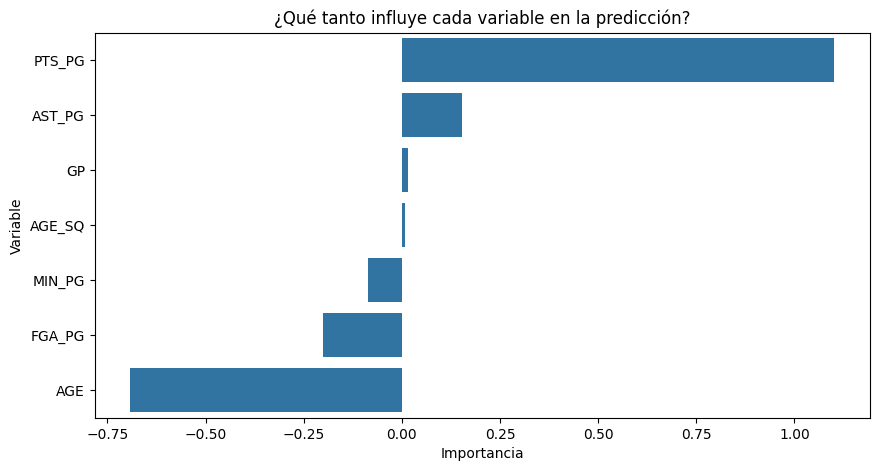

In [ ]:
## 8. Mejora del Modelo: Incorporando la Curva de Envejecimiento

# 1. Seleccionamis un nuevo set de variables incluyendo AGE(Edad)
# Añadimos AGE y una variable cuadrada AGE^2 (porque el envejecimiento no es una línea, es una curva)
df_final['AGE_SQ'] = df_final['AGE'] ** 2

features_v2= ['PTS_PG', 'MIN_PG', 'FGA_PG', 'AST_PG', 'AGE', 'AGE_SQ', 'GP']

X_v2= df_final[features_v2]
y = df_final['PPG_T+1']

# 2. Nueva división de datos

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y, test_size=0.2, random_state=42)

# 3. Entrenamos nuevamente la Regresión Lineal
model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

# 4. Predicción y nuevas métricas
preds_v2= model_v2.predict(X_test_v2)
mae_v2 = mean_absolute_error(y_test, preds_v2)
r2_v2 = r2_score(y_test_v2, preds_v2)

print("---📊 RESULTADOS DEL MODELO DE REGRESIÓN CON CURVA DE ENVEJECIMIENTO---")
print(f"Nuevo R²: {r2_v2:.4f} (Anterior: 0.7519)")
print(f" Nuevo MAE: {mae_v2:.4f} (Anterior: 2.4794)")

# 5. Visualización del impacto de la edad
#Calculo del coeficiente del modelo para entender cuánto pesa cada variable

coef_df= pd.DataFrame({'Variable': features_v2, 'Importancia': model_v2.coef_})
plt.figure(figsize= (10, 5))
sns.barplot(data=coef_df.sort_values('Importancia', ascending=False), x = 'Importancia', y='Variable')
plt.title('¿Qué tanto influye cada variable en la predicción?')
plt.show()



Al introducir la variable de Edad (AGE) y su transformación cuadrática ($Edad^2$), el modelo pudo entender que el rendimiento no crece linealmente para siempre, sino que alcanza un pico y luego declina. De esta manera, nuestra Regresión Lineal es más inteligente y precisa.

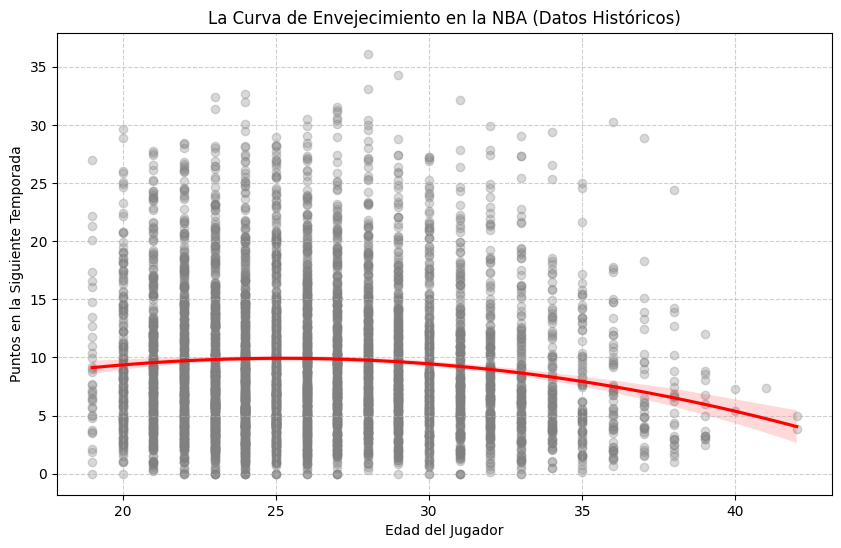

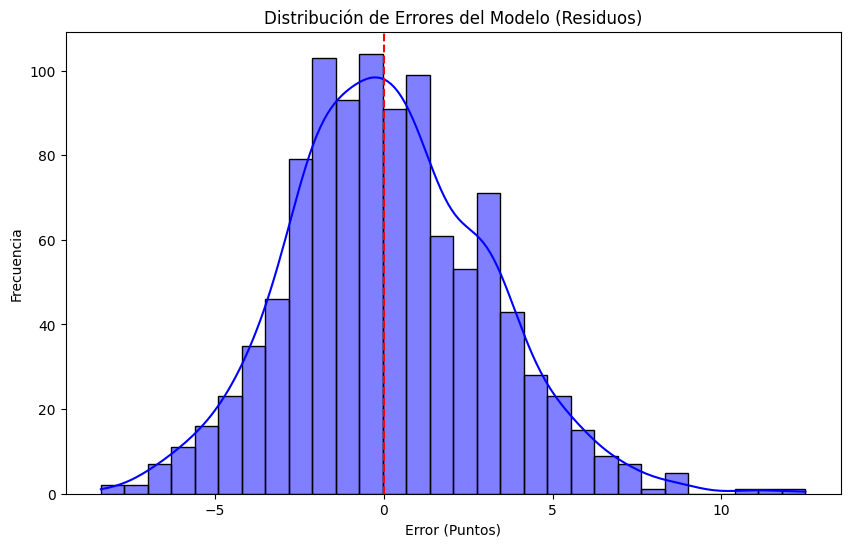

In [ ]:
## 9. Visualizaciones para el nuevo modelo

# Graficamos la relación entre Edad y Puntos Futuros
plt.figure(figsize=(10, 6))
sns.regplot(data=df_final, x='AGE', y='PPG_T+1', order=2,
            scatter_kws={'alpha':0.3, 'color':'gray'},
            line_kws={'color':'red'})

plt.title('La Curva de Envejecimiento en la NBA (Datos Históricos)')
plt.xlabel('Edad del Jugador')
plt.ylabel('Puntos en la Siguiente Temporada')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Calculamos los errores (Realidad - Predicción)
residuos = y_test_v2 - preds_v2

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de Errores del Modelo (Residuos)')
plt.xlabel('Error (Puntos)')
plt.ylabel('Frecuencia')
plt.show()

Con la Curva de Envejecimiento vemos cómo el modelo interpreta el ciclo de vida del atleta, validando estadísticamente el "prime" físico de los jugadores Mientras que con la gráfica de la Distribución de los Errores podemos observar una campana de Gauss centrada en cero que confirma que nuestro modelo es robusto, imparcial y que sus errores son puramente aleatorios.

In [ ]:
## 10. El Oráculo de la NBA: Predicción de Temporada 2025-26 (para modelo v2)

def predecir_jugador(nombre_jugador):
    # 1. Búsqueda (Agregamos na=False para evitar error con Doncic u otros nombres)
    jugador_data = df_raw[(df_raw['PLAYER_NAME'].str.contains(nombre_jugador, case=False, na=False)) &
                          (df_raw['SEASON'] == '2024-25')]

    if jugador_data.empty:
        print(f"⚠️ No se encontraron datos para '{nombre_jugador}' en la temporada 2024-25.")
        return

    # 2. Manejo de 'TOT' (Traspasos)
    if 'TOT' in jugador_data['TEAM_ABBREVIATION'].values:
        fila_stats = jugador_data[jugador_data['TEAM_ABBREVIATION'] == 'TOT'].iloc[0]
    else:
        fila_stats = jugador_data.iloc[0]

    # 3. Preparación de Features
    # Calculamos la edad y su cuadrado
    edad_actual = fila_stats['AGE']

    input_data = pd.DataFrame([{
        'PTS_PG': fila_stats['PTS'] / fila_stats['GP'],
        'MIN_PG': fila_stats['MIN'] / fila_stats['GP'],
        'FGA_PG': fila_stats['FGA'] / fila_stats['GP'],
        'AST_PG': fila_stats['AST'] / fila_stats['GP'],
        'AGE': edad_actual,
        'AGE_SQ': edad_actual ** 2,
        'GP': fila_stats['GP']
    }])

    # 4. Predicción usando 'model_v2'
    prediccion = model_v2.predict(input_data)[0]
    ppg_actual = input_data['PTS_PG'][0]

    # 5. Reporte Visual
    print(f"--- 🏀 Reporte de Predicción: {fila_stats['PLAYER_NAME']} ---")
    print(f"Edad: {int(edad_actual)} años")
    print(f"Puntos por Partido (2024-25): {ppg_actual:.1f}")
    print(f"Predicción para 2025-26: {prediccion:.1f} PPG")

    diferencia = prediccion - ppg_actual

    # Lógica de flechas para la tendencia
    if diferencia > 0.5:
        print(f"Tendencia: 📈 Ascendente (+{diferencia:.1f})")
    elif diferencia < -0.5:
        print(f"Tendencia: 📉 Descendente ({diferencia:.1f})")
    else:
        print("Tendencia: ➡️ Estable")
    print("-" * 40)

# --- EJECUCIÓN ---
# Insertar el nombre del jugador
predecir_jugador("Stephen Curry")
predecir_jugador("Wembanyama")
predecir_jugador("Luka")

--- 🏀 Reporte de Predicción: Stephen Curry ---
Edad: 37 años
Puntos por Partido (2024-25): 24.5
Predicción para 2025-26: 22.2 PPG
Tendencia: 📉 Descendente (-2.4)
----------------------------------------
--- 🏀 Reporte de Predicción: Victor Wembanyama ---
Edad: 21 años
Puntos por Partido (2024-25): 24.3
Predicción para 2025-26: 23.8 PPG
Tendencia: ➡️ Estable
----------------------------------------
--- 🏀 Reporte de Predicción: Luka Dončić ---
Edad: 26 años
Puntos por Partido (2024-25): 28.2
Predicción para 2025-26: 26.8 PPG
Tendencia: 📉 Descendente (-1.3)
----------------------------------------


Finalmente, podemos realizar una predicción en tiempo real ya que la función procesa los datos de la última temporada (2024-25), calcula las nuevas variables (incluyendo la edad proyectada) y entrega una estimación de PPG para la próxima temporada. Tambiénn podemos analizar las tendencias: no solo entregamos un número, sino que comparamos la predicción con el presente para identificar si un jugador está en una trayectoria Ascendente, Estable o en Declive